In [1]:
## Python Core
import datetime
import re
import math
from IPython.display import Markdown as md

## Data manipulation
import pandas as pd
import numpy as np


## Data Vizualization
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns




In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [3]:
PROJECT_PATH = "E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc"

In [4]:
quarters = {
    1999: range(1, 2),
    # 2015: range(1, 5),
    # 2016: range(1, 5),
    # 2017: range(1, 5),
    # 2018: range(1, 5),
    # 2019: range(1, 3),
}

In [5]:
loan_origination_files = [f"{PROJECT_PATH}/data/raw/freddie_mac/origination_data/historical_data_{year}Q{q}.txt" for year in quarters for q in quarters[year]]
loan_performance_files = [f"{PROJECT_PATH}/data/raw/freddie_mac/performance_data/historical_data_time_{year}Q{q}.txt" for year in quarters for q in quarters[year]]

In [6]:
loan_origination_files

['E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc/data/raw/freddie_mac/origination_data/historical_data_1999Q1.txt']

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\(.*\)", "", text)
    text = re.sub(r"[^a-z]", " ", text)
    text = text.strip()
    text = re.sub(r"\s+", "_", text)
    return text

In [6]:
loan_characteristic_columns_original_format = """Credit Score
First Payment Date
First Time Homebuyer Flag
Maturity Date
Metropolitan Statistical Area (MSA) Or Metropolitan Division
Mortgage Insurance Percentage (MI %)
Number of Units
Occupancy Status
Original Combined Loan-to-Value (CLTV)
Original Debt-to-Income (DTI) Ratio
Original UPB
Original Loan-to-Value (LTV)
Original Interest Rate
Channel
Prepayment Penalty Mortgage (PPM) Flag
Amortization Type (Formerly Product Type)
Property State
Property Type
Postal Code
Loan Sequence Number
Loan Purpose
Original Loan Term
Number of Borrowers
Seller Name
Servicer Name
Super Conforming Flag
Pre-HARP Loan Sequence Number
Program Indicator
HARP Indicator
Property Valuation Method
Interest Only (I/O) Indicator"""
loan_characteristic_columns_original_format = loan_characteristic_columns_original_format.split("\n")
loan_characteristic_columns = [clean_text(loan_char_column) for loan_char_column in loan_characteristic_columns_original_format]
pprint(loan_characteristic_columns)

['credit_score',
 'first_payment_date',
 'first_time_homebuyer_flag',
 'maturity_date',
 'metropolitan_statistical_area_or_metropolitan_division',
 'mortgage_insurance_percentage',
 'number_of_units',
 'occupancy_status',
 'original_combined_loan_to_value',
 'original_debt_to_income_ratio',
 'original_upb',
 'original_loan_to_value',
 'original_interest_rate',
 'channel',
 'prepayment_penalty_mortgage_flag',
 'amortization_type',
 'property_state',
 'property_type',
 'postal_code',
 'loan_sequence_number',
 'loan_purpose',
 'original_loan_term',
 'number_of_borrowers',
 'seller_name',
 'servicer_name',
 'super_conforming_flag',
 'pre_harp_loan_sequence_number',
 'program_indicator',
 'harp_indicator',
 'property_valuation_method',
 'interest_only_indicator']


In [7]:
loan_perf_columns_original_format = """Loan Sequence Number
Monthly Reporting Period
Current Actual UPB
Current Loan Delinquency Status
Loan Age
Remaining Months to Legal Maturity
Defect Settlement Date
Modification Flag
Zero Balance Code
Zero Balance Effective Date
Current Interest Rate
Current Deferred UPB
Due Date of Last Paid Installment (DDLPI)
MI Recoveries
Net Sales Proceeds
Non MI Recoveries
Expenses
Legal Costs
Maintenance and Preservation Costs
Taxes and Insurance
Miscellaneous Expenses
Actual Loss Calculation
Modification Cost
Step Modification Flag
Deferred Payment Plan
Estimated Loan-to-Value (ELTV)
Zero Balance Removal UPB
Delinquent Accrued Interest
Delinquency Due to Disaster
Borrower Assistance Status Code
Current Month Modification Cost
Interest Bearing UPB"""
loan_perf_columns_original_format = loan_perf_columns_original_format.split("\n")
loan_performance_columns = [clean_text(loan_performance_column) for loan_performance_column in loan_perf_columns_original_format]
pprint(loan_performance_columns)

['loan_sequence_number',
 'monthly_reporting_period',
 'current_actual_upb',
 'current_loan_delinquency_status',
 'loan_age',
 'remaining_months_to_legal_maturity',
 'defect_settlement_date',
 'modification_flag',
 'zero_balance_code',
 'zero_balance_effective_date',
 'current_interest_rate',
 'current_deferred_upb',
 'due_date_of_last_paid_installment',
 'mi_recoveries',
 'net_sales_proceeds',
 'non_mi_recoveries',
 'expenses',
 'legal_costs',
 'maintenance_and_preservation_costs',
 'taxes_and_insurance',
 'miscellaneous_expenses',
 'actual_loss_calculation',
 'modification_cost',
 'step_modification_flag',
 'deferred_payment_plan',
 'estimated_loan_to_value',
 'zero_balance_removal_upb',
 'delinquent_accrued_interest',
 'delinquency_due_to_disaster',
 'borrower_assistance_status_code',
 'current_month_modification_cost',
 'interest_bearing_upb']


In [8]:
set(loan_characteristic_columns).intersection(loan_performance_columns)

{'loan_sequence_number'}

# Loan Characteristics at the time of Origination

- Consists of loans originated in a quarter
- First Payment Date need not be in that quarter, could be later

In [9]:
loan_origination_df = []
for loan_origin_filename in loan_origination_files:
    loan_origination_quarter_df = pd.read_csv(loan_origin_filename, delimiter="|", header=None)
    loan_origination_df.append(loan_origination_quarter_df)
    
loan_origination_df = pd.concat(loan_origination_df, ignore_index=True)
loan_origination_df.columns = loan_characteristic_columns

loan_origination_df["origination_quarter"] = [loan_sequence_number[1:5] for loan_sequence_number in loan_origination_df["loan_sequence_number"].to_numpy()]

In [10]:
loan_origination_df["first_payment_date"] = pd.to_datetime(loan_origination_df["first_payment_date"],
                                                    format="%Y%m").dt.date
loan_origination_df["maturity_date"] = pd.to_datetime(loan_origination_df["maturity_date"],
                                               format="%Y%m").dt.date
# loan_origination_df['metropolitan_statistical_area_or_metropolitan_division'] = loan_origination_df['metropolitan_statistical_area_or_metropolitan_division'].astype(str)


In [11]:
loan_origination_df.head()

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_statistical_area_or_metropolitan_division,mortgage_insurance_percentage,number_of_units,occupancy_status,original_combined_loan_to_value,original_debt_to_income_ratio,original_upb,original_loan_to_value,original_interest_rate,channel,prepayment_penalty_mortgage_flag,amortization_type,property_state,property_type,postal_code,loan_sequence_number,loan_purpose,original_loan_term,number_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre_harp_loan_sequence_number,program_indicator,harp_indicator,property_valuation_method,interest_only_indicator,origination_quarter
0,799,1999-05-01,N,2014-04-01,NaN,0,1,P,48,38,60000,48,5.88,R,N,FRM,PA,SF,17500,F99Q10000001,N,180,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,99Q1
1,751,1999-10-01,N,2029-09-01,NaN,0,1,P,71,20,180000,71,6.30,R,N,FRM,PA,SF,19300,F99Q10000002,P,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,99Q1
2,733,1999-09-01,N,2029-08-01,"29,540.00",0,1,P,51,999,116000,51,6.30,R,N,FRM,PA,SF,17500,F99Q10000003,P,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,99Q1
3,755,1999-05-01,N,2029-04-01,"29,540.00",30,1,P,95,38,138000,95,6.60,R,N,FRM,PA,SF,17500,F99Q10000004,P,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,99Q1
4,669,2002-06-01,N,2029-01-01,NaN,0,1,P,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F99Q10000005,P,320,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,99Q1


In [12]:
loan_origination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487558 entries, 0 to 487557
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   credit_score                                            487558 non-null  int64  
 1   first_payment_date                                      487558 non-null  object 
 2   first_time_homebuyer_flag                               487558 non-null  object 
 3   maturity_date                                           487558 non-null  object 
 4   metropolitan_statistical_area_or_metropolitan_division  244803 non-null  float64
 5   mortgage_insurance_percentage                           487558 non-null  int64  
 6   number_of_units                                         487558 non-null  int64  
 7   occupancy_status                                        487558 non-null  object 
 8   original_combined_loan_t

In [13]:
loan_origination_df.replace({"credit_score": {9999: None},
                      "first_time_homebuyer_flag": {'9': None},
                      "mortgage_insurance_percentage": {999: None},
                      "number_of_units": {99: None},
                      "occupancy_status": {'9': None},
                      "original_combined_loan_to_value": {999: None},
                      "original_debt_to_income_ratio": {999: None},
                      "original_loan_to_value": {999: None},
                      "channel": {'9': None},
                      "property_type": {'99': None},
                      "loan_purpose": {'9': None},
                      "number_of_borrowers": {99: None},
                      "program_indicator": {9: None},
                      "harp_indicator": {np.float64(None): None, 
                                         " ": "N"},
                      "property_valuation_method": {9: None}
                     },
                     inplace=True
                    )

In [14]:
loan_origination_df["loan_sequence_number"].nunique() == loan_origination_df.shape[0]

True

### Remove Null Values

In [15]:
missing_char_data = pd.DataFrame({
    "count": loan_origination_df.isna().sum(),
    "pct": loan_origination_df.isna().mean()*100
})
missing_char_data[missing_char_data.pct>0]

,count,pct
credit_score,1645,0.34
first_time_homebuyer_flag,6043,1.24
metropolitan_statistical_area_or_metropolitan_division,242755,49.79
mortgage_insurance_percentage,44,0.01
number_of_units,26,0.01
original_combined_loan_to_value,38,0.01
original_debt_to_income_ratio,25569,5.24
original_loan_to_value,38,0.01
channel,14,0.00
property_type,20,0.00


In [16]:
loan_char_cols_to_remove = [
    'super_conforming_flag',
    'pre_harp_loan_sequence_number',
    'program_indicator',
    'harp_indicator',
    'property_valuation_method']

['super_conforming_flag',
 'pre_harp_loan_sequence_number',
 'program_indicator',
 'harp_indicator',
 'property_valuation_method']


In [17]:
loan_origination_df.drop(columns=loan_char_cols_to_remove, inplace=True)

In [18]:
md(f"## {loan_characteristic_columns_original_format[0]}")

## Credit Score

- A number, prepared by third parties, summarizing the borrower’s creditworthiness, which may be indicative of the likelihood that the borrower will timely repay future obligations.
- Generally, the credit_score disclosed is the score known at the time of acquisition and is the score used to originate the mortgage.

In [19]:
loan_origination_df["credit_score"].isna().value_counts()

False    485913
True       1645
Name: credit_score, dtype: int64

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

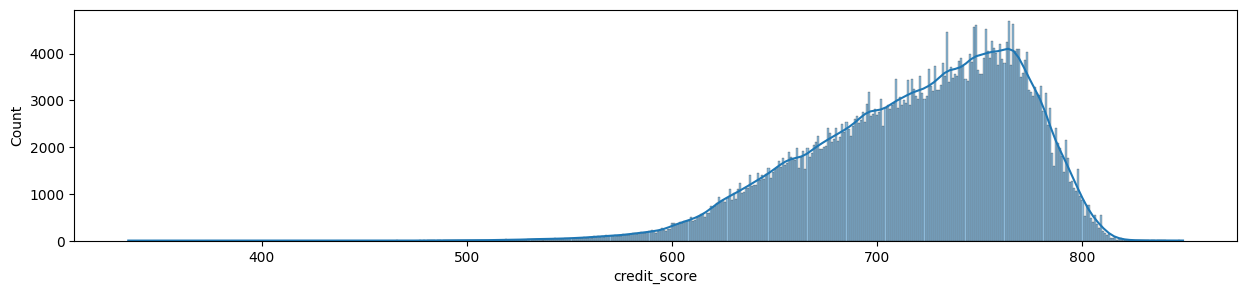

In [20]:
plt.figure(figsize=(15,3))
sns.histplot(x="credit_score", data=loan_origination_df, bins=100, kde=True)

In [21]:
md(f"## {loan_characteristic_columns_original_format[1]}")

## First Payment Date

- The date of the first scheduled mortgage payment due under the terms of the mortgage note.

In [22]:
loan_origination_df["first_payment_date"].describe()

count         487558
unique            85
top       1999-03-01
freq          161042
Name: first_payment_date, dtype: object

<AxesSubplot:>

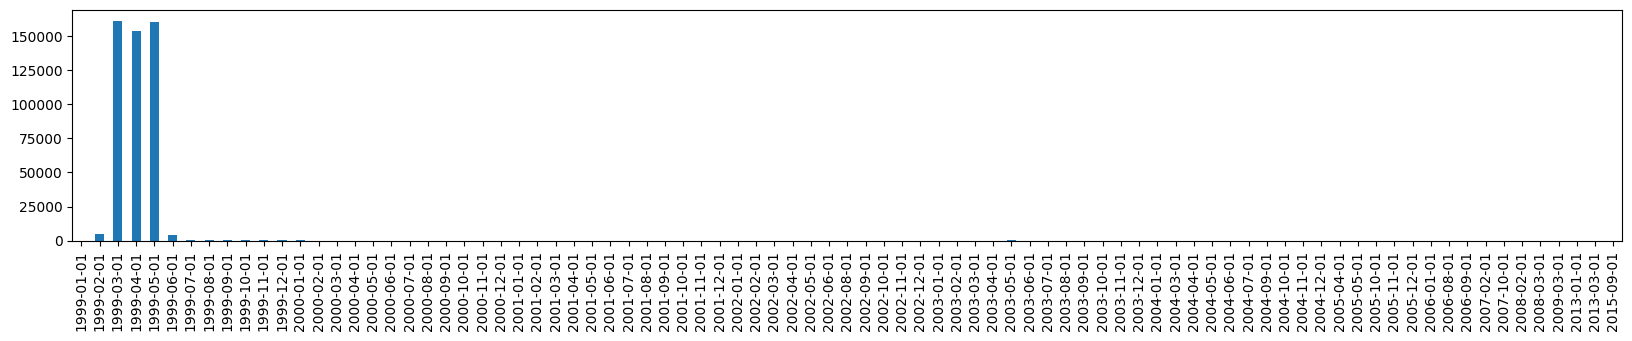

In [23]:
loan_origination_df["first_payment_date"].value_counts().sort_index().plot(kind="bar", figsize=(20, 3))

In [24]:
md(f"## {loan_characteristic_columns_original_format[2]}")

## First Time Homebuyer Flag

Indicates whether the Borrower, or one of a group of Borrowers, is an individual who
1.  is purchasing the mortgaged property
2.  will reside in the mortgaged property as a primary residence and
3.  had no ownership interest (sole or joint) in a residential property during the three-year period preceding the date of the purchase of the mortgaged property

With certain limited exceptions, a displaced homemaker or single parent may also be considered a First-Time Homebuyer if the individual had no ownership interest in a residential property during the preceding three-year period other than an ownership interest in the marital residence with a spouse.

In [25]:
loan_origination_df["first_time_homebuyer_flag"].value_counts()

N    454902
Y     26613
Name: first_time_homebuyer_flag, dtype: int64

In [26]:
md(f"## {loan_characteristic_columns_original_format[3]}")

## Maturity Date

The month in which the final monthly payment on the mortgage is scheduled to be made as stated on the original mortgage note.

In [27]:
loan_origination_df["maturity_date"].describe()

count         487558
unique           327
top       2029-04-01
freq           98583
Name: maturity_date, dtype: object

In [28]:
md(f"## {loan_characteristic_columns_original_format[4]}")

## Metropolitan Statistical Area (MSA) Or Metropolitan Division

- This disclosure will be based on the designation of the Metropolitan Statistical Area or Metropolitan Division as of the date of issuance. 
- Metropolitan Statistical Areas (MSAs) are defined by the United States Office of Management and Budget (OMB) and have at least one urbanized area with a population of 50,000 or more inhabitants. 
- An MSA containing a single core with a population of 2.5 million or more may be divided into smaller groups of counties that OMB refers to as Metropolitan Divisions. 
- If an MSA applies to a mortgaged property, the applicable five-digit value is disclosed; however, if the mortgaged property also falls within a Metropolitan Division classification, the applicable five-digit value for the Metropolitan Division takes precedence and is disclosed instead.
- This disclosure will not be updated to reflect any subsequent changes in designations of MSAs, Metropolitan Divisions or other classifications.
- Null indicates that the area in which the mortgaged property is located is (a) neither an MSA nor a Metropolitan Division, or (b) unknown.

In [29]:
md(f"## {loan_characteristic_columns_original_format[5]}")

## Mortgage Insurance Percentage (MI %)

In [30]:
loan_origination_df["mortgage_insurance_percentage"].astype(np.float64).describe()

count   487,514.00
mean          3.88
std           9.22
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          55.00
Name: mortgage_insurance_percentage, dtype: float64

<AxesSubplot:xlabel='mortgage_insurance_percentage', ylabel='Count'>

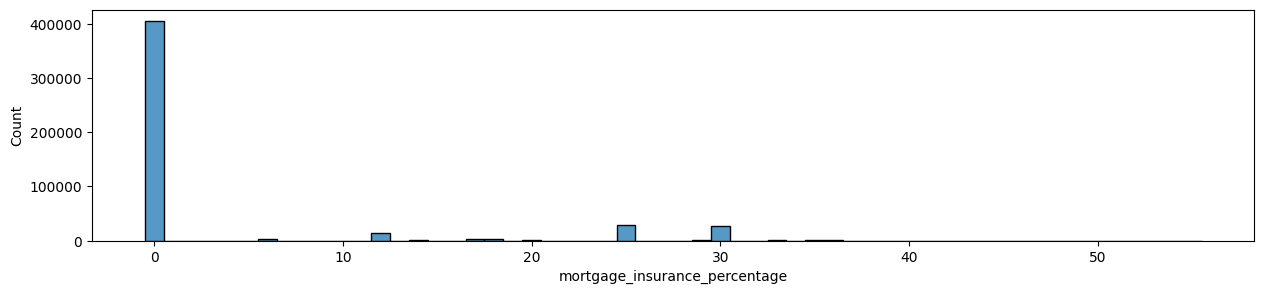

In [31]:
plt.figure(figsize=(15,3))
sns.histplot(x="mortgage_insurance_percentage", data=loan_origination_df)

In [32]:
md(f"## {loan_characteristic_columns_original_format[6]}")

## Number of Units

- Denotes whether the mortgage is a one-, two-, three-, or four-unit property.

In [33]:
loan_origination_df["number_of_units"].value_counts()

1    476509
2      8561
3      1337
4      1125
Name: number_of_units, dtype: int64

In [34]:
md(f"## {loan_characteristic_columns_original_format[7]}")

## Occupancy Status

- Denotes whether the mortgage type is owner occupied, second home, or investment property.
- Value meaning:
    - P = Primary Residence
    - I = Investment Property
    - S = Second Home
    - 9 = Not Available

In [35]:
loan_origination_df["occupancy_status"].value_counts()

P    459937
I     16875
S     10746
Name: occupancy_status, dtype: int64

In [36]:
md(f"## {loan_characteristic_columns_original_format[8]}")

## Original Combined Loan-to-Value (CLTV)

- In the case of a purchase mortgage loan, the ratio is obtained by dividing the original mortgage loan amount on the note date plus any secondary mortgage loan amount disclosed by  the Seller by the lesser of the mortgaged property’s appraised value on the note date or its purchase price. 
- In the case of a refinance mortgage loan, the ratio is obtained by dividing the original mortgage loan amount on the note date plus any secondary mortgage loan amount disclosed by the Seller by the mortgaged property’s appraised value on the note date.
- If the secondary financing amount disclosed by the Seller includes a home equity line of credit, then the CLTV calculation reflects the disbursed amount at closing of the first lien mortgage loan, not the maximum loan amount available under the home equity line of credit. 
- In the case of a seasoned mortgage loan, if the Seller cannot warrant that the value of the mortgaged property has not declined since the note date, Freddie Mac requires that the Seller must provide a new appraisal value, which is used in the CLTV calculation. 
- In certain cases, where the Seller delivered a loan to Freddie Mac with a special code indicating additional secondary mortgage loan amounts, those amounts may have been included in the CLTV calculation.
- If the CLTV is < LTV, set the CLTV to ‘Not Available.’ This disclosure is subject to the widely varying standards originators use to verify Borrowers’ secondary mortgage loan  mounts and will not be updated.

<AxesSubplot:xlabel='original_combined_loan_to_value', ylabel='Count'>

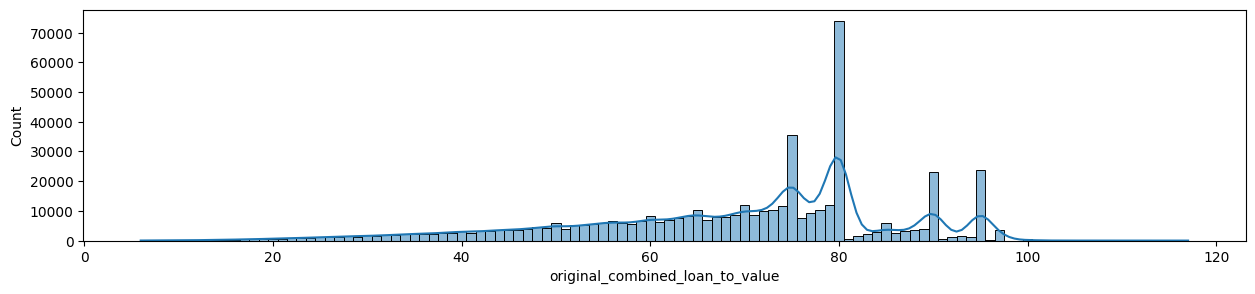

In [37]:
plt.figure(figsize=(15,3))
sns.histplot(x="original_combined_loan_to_value", data=loan_origination_df, kde=True)

In [38]:
(loan_origination_df["original_combined_loan_to_value"] < loan_origination_df["original_loan_to_value"]).value_counts()

False    487558
dtype: int64

In [39]:
md(f"## {loan_characteristic_columns_original_format[9]}")

## Original Debt-to-Income (DTI) Ratio

- Disclosure of the debt to income ratio is based on 
    1. the sum of the borrower's monthly debt payments, including monthly housing expenses that incorporate the mortgage payment the borrower is making at the time of the delivery
of the mortgage loan to Freddie Mac, divided by
    2. the total monthly income used to underwrite the loan as of the date of the origination of the such loan.
- Ratios greater than 65% are indicated that data is Not Available. 
- All loans in the HARP dataset will be disclosed as Not Available. 
- This disclosure is subject to the widely varying standards originators use to verify Borrowers’ assets and liabilities and will not be updated.

<AxesSubplot:xlabel='original_debt_to_income_ratio', ylabel='Count'>

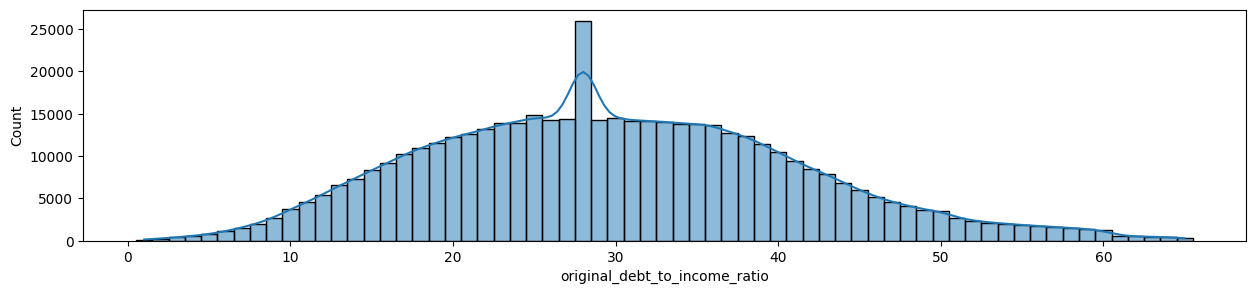

In [40]:
plt.figure(figsize=(15,3))
sns.histplot(x="original_debt_to_income_ratio", data=loan_origination_df, kde=True)

In [41]:
md(f"## {loan_characteristic_columns_original_format[10]}")

## Original UPB

- The Unpaid Principal Balance (UPB) of the mortgage on the note date

In [42]:
loan_origination_df["original_upb"].describe()

count   487,558.00
mean    114,261.97
std      55,357.08
min       6,000.00
25%      71,000.00
50%     103,000.00
75%     149,000.00
max     500,000.00
Name: original_upb, dtype: float64

<AxesSubplot:xlabel='original_upb', ylabel='Count'>

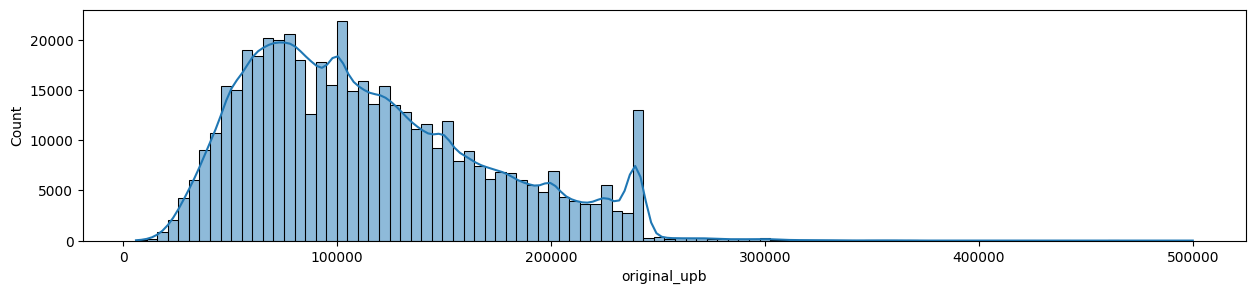

In [43]:
plt.figure(figsize=(15,3))
sns.histplot(x="original_upb", bins=100, data=loan_origination_df, kde=True)

In [44]:
md(f"## {loan_characteristic_columns_original_format[11]}")

## Original Loan-to-Value (LTV)

- In the case of a purchase mortgage loan, the ratio obtained by dividing the original mortgage loan amount on the note date by the lesser of the mortgaged property’s appraised value on the note date or its purchase price.
- In the case of a refinance mortgage loan, the ratio obtained by dividing the original mortgage loan amount on the note date and the mortgaged property’s appraised value on the note date.
- In the case of a seasoned mortgage loan, if the Seller cannot warrant that the value of the mortgaged property has not declined since the note date, Freddie Mac requires that the Seller must provide a new appraisal value, which is used in the LTV calculation.
- For loans in the non HARP dataset, ratios below 6% or greater than 105% will be disclosed as “Not Available,” indicated by 999. 
- For loans in the HARP dataset, LTV ratios greater than 999% will be disclosed as Not Available.

<AxesSubplot:xlabel='original_loan_to_value', ylabel='Count'>

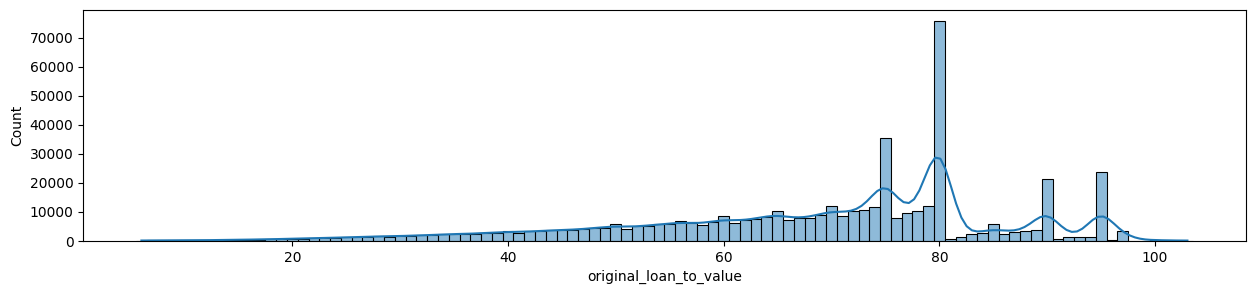

In [45]:
plt.figure(figsize=(15,3))
sns.histplot(x="original_loan_to_value", bins=100, data=loan_origination_df, kde=True)

In [46]:
md(f"## {loan_characteristic_columns_original_format[12]}")

## Original Interest Rate

- The original note rate as indicated on the mortgage note.

<AxesSubplot:xlabel='original_interest_rate', ylabel='Count'>

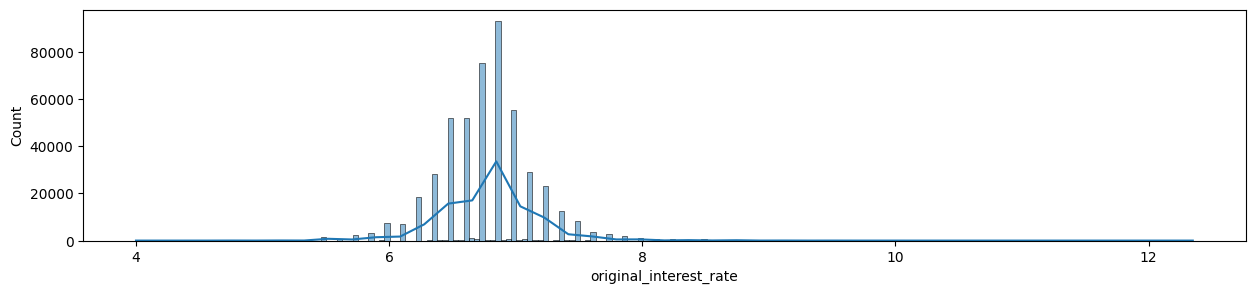

In [47]:
plt.figure(figsize=(15,3))
sns.histplot(x="original_interest_rate", 
             bins=200, 
             data=loan_origination_df, 
             kde=True,
             kde_kws={"gridsize": 45}
            )

In [48]:
md(f"## {loan_characteristic_columns_original_format[13]}")

## Channel

- Disclosure indicates whether a Broker or Correspondent, as those terms are defined below, originated or was involved in the origination of the mortgage loan. 
- If a Third Party Origination is applicable, but the Seller does not specify Broker or Correspondent, the disclosure will indicate “TPO Not Specified”. 
- Similarly, if neither Third Party Origination nor Retail designations are available, the disclosure will indicate “TPO Not Specified.” 
- If a Broker, Correspondent or Third Party Origination disclosure is not applicable, the mortgage loan will be designated as Retail, as defined below.

#### Broker

- Broker is a person or entity that specializes in loan originations, receiving a commission (from a Correspondent or other lender) to match Borrowers and lenders. 
- The Broker performs some or most of the loan processing functions, such as taking loan applications, or ordering credit reports, appraisals and title reports. 
- Typically, the Broker does not underwrite or service the mortgage loan and generally does not use its own funds for closing; 
- However, if the Broker funded a mortgage loan on a lender’s behalf, such a mortgage loan is considered a “Broker” third party origination mortgage loan. 
- The mortgage loan is generally closed in the name of the lender who commissioned the Broker's services.

#### Correspondent

- Correspondent is an entity that typically sells the Mortgages it originates to other lenders, which are not Affiliates of that entity, under a specific commitment or as part of an ongoing relationship. 
- The Correspondent performs some, or all, of the loan processing functions, such as: taking the loan application; ordering credit reports, appraisals, and title reports; and verifying the Borrower's income and employment.
- The Correspondent may or may not have delegated underwriting and typically funds the mortgage loans at settlement. 
- The mortgage loan is closed in the Correspondent's name and the Correspondent may or may not service the mortgage loan. 
- The Correspondent may use a Broker to perform some of the processing functions or even to fund the loan on its behalf; under such circumstances, the mortgage loan is considered a “Broker” third party origination mortgage loan, rather than a “Correspondent” third party origination mortgage loan.

#### Retail Mortgage

- Retail Mortgage is a mortgage loan that is originated, underwritten and funded by a lender or its Affiliates.
- The mortgage loan is closed in the name of the lender or its Affiliate and if it is sold to Freddie Mac, it is sold by the lender or its Affiliate that originated it. 
- A mortgage loan that a Broker or Correspondent completely or partially originated, processed, underwrote, packaged, funded or closed is not considered a Retail mortgage loan.

For purposes of the definitions of Correspondent and Retail, “Affiliate" means any entity that is related to another party as a consequence of the entity, directly or indirectly,  controlling the other party, being controlled by the other party, or being under common control with the other party.

- Value meaning
    - R = Retail
    - B = Broker
    - C = Correspondent
    - T = TPO Not Specified
    - 9 = Not Available



In [49]:
md(f"## {loan_characteristic_columns_original_format[14]}")

## Prepayment Penalty Mortgage (PPM) Flag

- Denotes whether the mortgage is a PPM. 
- A PPM is a mortgage with respect to which the borrower is, or at any time has been, obligated to pay a penalty in the event of certain repayments of principal.

In [50]:
loan_origination_df["prepayment_penalty_mortgage_flag"].value_counts()

N    480644
Y      6914
Name: prepayment_penalty_mortgage_flag, dtype: int64

In [51]:
md(f"## {loan_characteristic_columns_original_format[15]}")

## Amortization Type (Formerly Product Type)

- Denotes that the product is a fixed-rate mortgage or adjustable-rate mortgage. 
- Value meaning
    - FRM – Fixed Rate Mortgage
    - ARM – Adjustable Rate Mortgage

In [52]:
loan_origination_df["amortization_type"].value_counts()

FRM    487558
Name: amortization_type, dtype: int64

In [53]:
md(f"## {loan_characteristic_columns_original_format[16]}")

## Property State

A two-letter abbreviation indicating the state or territory within which the property securing the mortgage is located.

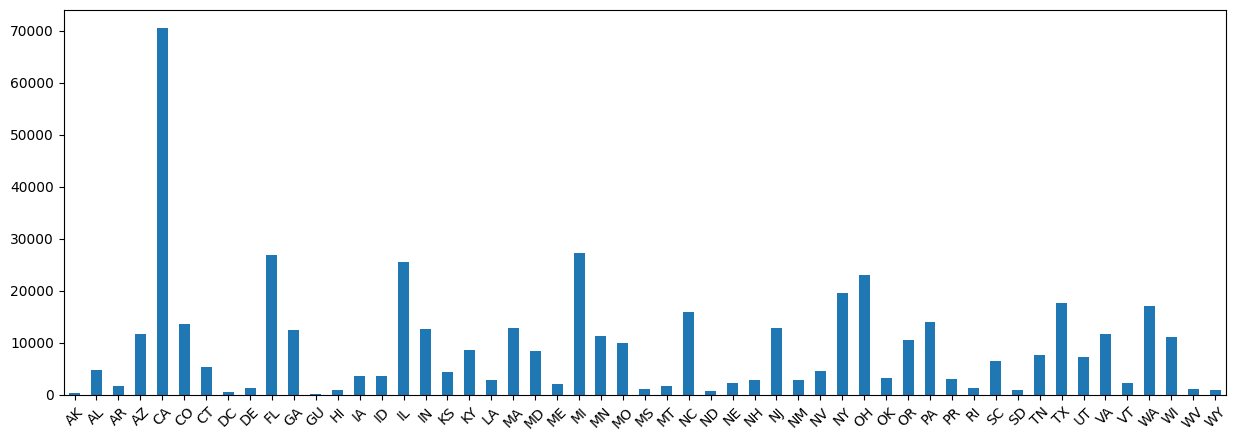

In [54]:
ax = loan_origination_df["property_state"].value_counts().sort_index().plot(kind="bar", figsize=(15,5))
_ = plt.xticks(rotation=45)

In [55]:
md(f"## {loan_characteristic_columns_original_format[17]}")

## Property Type

- Denotes whether the property type secured by the mortgage is a condominium, leasehold, planned unit development (PUD), cooperative share, manufactured home, or Single-Family home. 
- Value meaning
    - CO = Condo
    - PU = PUD
    - MH = Manufactured Housing
    - SF = Single-Family
    - CP = Co-op
    - 99 = Not Available

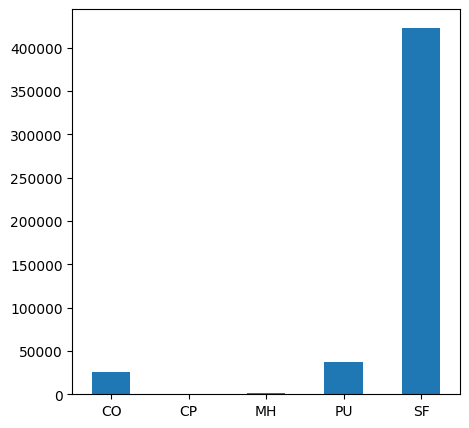

In [56]:
ax = loan_origination_df["property_type"].value_counts().sort_index().plot(kind="bar", figsize=(5,5))
# _ = plt.xticks(["Condo", "Co-op", "Manufactured Housing", "PUD", "Single Family"])
_ = plt.xticks(rotation=0)

In [57]:
md(f"## {loan_characteristic_columns_original_format[20]}")

## Loan Purpose

- Indicates whether the mortgage loan is a Cashout Refinance mortgage, No Cash-out Refinance mortgage, or a Purchase mortgage.
- Generally, a Cash-out Refinance mortgage loan is a mortgage loan in which the use of the loan amount is not limited to specific purposes. 
- A mortgage loan placed on a property previously owned free and clear by the Borrower is always considered a Cash-out Refinance mortgage loan.
- Generally, a No Cash-out Refinance mortgage loan is a mortgage loan in which the loan amount is limited to the following uses:
    - Pay off the first mortgage, regardless of its age
    - Pay off any junior liens secured by the mortgaged property, that were used in their entirety to acquire the subject property
    - Pay related closing costs, financing costs and prepaid items, and
    - Disburse cash out to the Borrower (or any other payee) not to exceed 2\% of the new refinance mortgage loan or \$2,000, whichever is less.
- As an exception to the above, for construction conversion mortgage loans and renovation mortgage loans, the amount of the interim construction financing secured by the mortgaged property is considered an amount used to pay off the first mortgage. 
- Paying off unsecured liens or construction costs paid by the Borrower outside of the secured interim construction financing is considered cash out to the Borrower, if greater than $2000 or 2% of loan amount.
- This disclosure is subject to various special exceptions used by Sellers to determine whether a mortgage loan is a No Cash-out Refinance mortgage loan.
- Value meaning
    - P = Purchase
    - C = Refinance - Cash Out
    - N = Refinance - No Cash Out
    - R = Refinance - Not Specified
    - 9 = Not Available

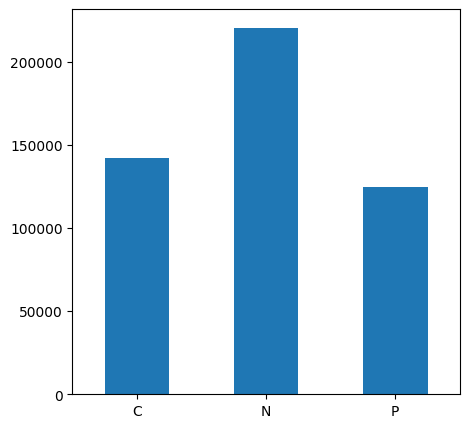

In [58]:
ax = loan_origination_df["loan_purpose"].value_counts().sort_index().plot(kind="bar", figsize=(5,5))
_ = plt.xticks(rotation=0)

In [59]:
md(f"## {loan_characteristic_columns_original_format[21]}")

## Original Loan Term

- A calculation of the number of scheduled monthly payments of the mortgage based on the First Payment Date and Maturity Date.

In [60]:
loan_origination_df["number_of_borrowers"].value_counts()

2    335072
1    152058
Name: number_of_borrowers, dtype: int64

In [61]:
md(f"## {loan_characteristic_columns_original_format[22]}")

## Number of Borrowers

- The number of Borrower(s) who are obligated to repay the mortgage note secured by the mortgaged property.
- Disclosure denotes only whether there is one borrower, or more than one borrower associated with the mortgage note. 
- This disclosure will not be updated to reflect any subsequent assumption of the mortgage note.
- Value meaning
    - 2018Q1 and prior:
        - 01 = 1 borrower
        - 02 = > 1 borrowers
        - 99 = Not Available
    - 2018Q2 and later:
        - 01 = 1 borrower
        - 02 = 2 borrowers
        - 03 = 3 borrowers
        - ..
        - 09 = 9 borrowers
        - 10 = 10 borrowers
        - 99 = Not Available

In [62]:
md(f"## {loan_characteristic_columns_original_format[23]}")

## Seller Name

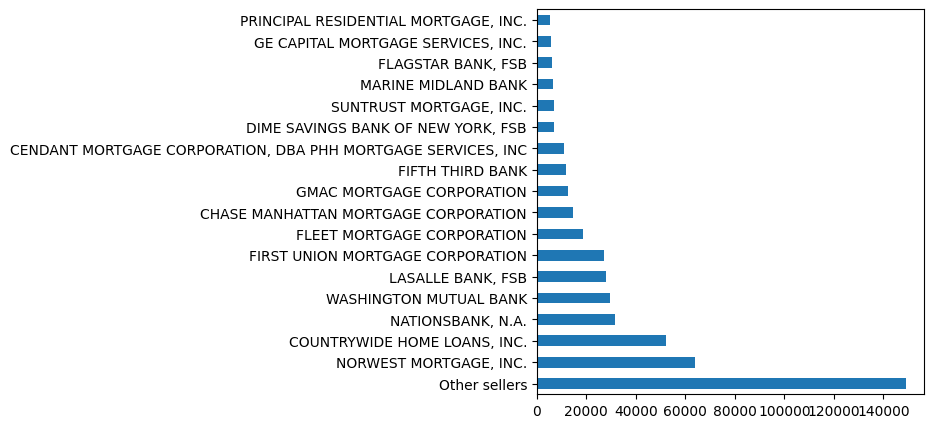

In [63]:
ax = loan_origination_df["seller_name"].value_counts().plot(kind="barh", figsize=(5,5))

In [64]:
md(f"## {loan_characteristic_columns_original_format[24]}")

## Servicer Name

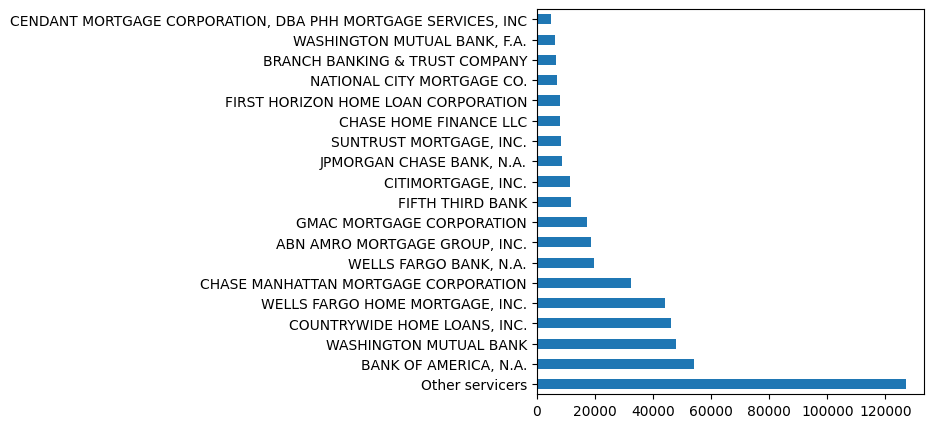

In [65]:
ax = loan_origination_df["servicer_name"].value_counts().plot(kind="barh", figsize=(5,5))

# Loan Performance

In [66]:
loan_performance_df = []
for loan_performance_filename in loan_performance_files:
    loan_performance_quarter_df = pd.read_csv(loan_performance_filename, delimiter="|", header=None)
    loan_performance_df.append(loan_performance_quarter_df)
    
loan_performance_df = pd.concat(loan_performance_df, ignore_index=True)
loan_performance_df.columns = loan_performance_columns


C:\Users\ashwi\anaconda3\envs\Credit_Risk_Modeling\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,7,14,23,24,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
loan_performance_df.replace({"current_loan_delinquency_status": {'XX': None,
                                                                 '   ': -1
                                                                },
                             ""
                             
                            },
                            inplace=True
                            )

In [67]:
loan_performance_df["monthly_reporting_period"] = pd.to_datetime(loan_performance_df["monthly_reporting_period"], 
                                                                 format="%Y%m").dt.date

In [68]:
loan_performance_df.head()

,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,defect_settlement_date,modification_flag,zero_balance_code,zero_balance_effective_date,current_interest_rate,current_deferred_upb,due_date_of_last_paid_installment,mi_recoveries,net_sales_proceeds,non_mi_recoveries,expenses,legal_costs,maintenance_and_preservation_costs,taxes_and_insurance,miscellaneous_expenses,actual_loss_calculation,modification_cost,step_modification_flag,deferred_payment_plan,estimated_loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,delinquency_due_to_disaster,borrower_assistance_status_code,current_month_modification_cost,interest_bearing_upb
0,F99Q10000001,2002-05-01,"48,711.25",0,37,143,NaN,NaN,NaN,NaN,5.88,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48,711.25"
1,F99Q10000001,2002-06-01,"48,449.55",0,38,142,NaN,NaN,NaN,NaN,5.88,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48,449.55"
2,F99Q10000001,2002-07-01,"48,186.57",0,39,141,NaN,NaN,NaN,NaN,5.88,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48,186.57"
3,F99Q10000001,2002-08-01,"47,922.30",0,40,140,NaN,NaN,NaN,NaN,5.88,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"47,922.30"
4,F99Q10000001,2002-09-01,"47,656.74",0,41,139,NaN,NaN,NaN,NaN,5.88,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"47,656.74"


In [69]:
loan_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29661291 entries, 0 to 29661290
Data columns (total 32 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   loan_sequence_number                object 
 1   monthly_reporting_period            object 
 2   current_actual_upb                  float64
 3   current_loan_delinquency_status     object 
 4   loan_age                            int64  
 5   remaining_months_to_legal_maturity  int64  
 6   defect_settlement_date              float64
 7   modification_flag                   object 
 8   zero_balance_code                   float64
 9   zero_balance_effective_date         float64
 10  current_interest_rate               float64
 11  current_deferred_upb                float64
 12  due_date_of_last_paid_installment   float64
 13  mi_recoveries                       float64
 14  net_sales_proceeds                  object 
 15  non_mi_recoveries                   float64
 16

### Remove Null Values

In [70]:
missing_perf_data = pd.DataFrame({
    "count": loan_performance_df.isna().sum(),
    "pct": loan_performance_df.isna().mean()*100
})
missing_perf_data[missing_perf_data.pct>0]

,count,pct
defect_settlement_date,29660395,100.00
modification_flag,29555473,99.64
zero_balance_code,29176914,98.37
zero_balance_effective_date,29176937,98.37
due_date_of_last_paid_installment,29640829,99.93
mi_recoveries,29657224,99.99
net_sales_proceeds,29657073,99.99
non_mi_recoveries,29657224,99.99
expenses,29657224,99.99
legal_costs,29657224,99.99


In [71]:
load_perf_cols_to_remove = list(missing_perf_data[missing_perf_data.pct>90].index)
pprint(load_perf_cols_to_remove)

['defect_settlement_date',
 'modification_flag',
 'zero_balance_code',
 'zero_balance_effective_date',
 'due_date_of_last_paid_installment',
 'mi_recoveries',
 'net_sales_proceeds',
 'non_mi_recoveries',
 'expenses',
 'legal_costs',
 'maintenance_and_preservation_costs',
 'taxes_and_insurance',
 'miscellaneous_expenses',
 'actual_loss_calculation',
 'modification_cost',
 'step_modification_flag',
 'deferred_payment_plan',
 'estimated_loan_to_value',
 'zero_balance_removal_upb',
 'delinquent_accrued_interest',
 'delinquency_due_to_disaster',
 'borrower_assistance_status_code',
 'current_month_modification_cost']


In [72]:
loan_performance_df.drop(columns=load_perf_cols_to_remove, 
                         inplace=True)

In [73]:
loan_origination_df["loan_sequence_number"].nunique(), loan_performance_df["loan_sequence_number"].nunique()

(487558, 487549)

In [88]:
loan_performance_df.head()

,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,current_interest_rate,current_deferred_upb,interest_bearing_upb
0,F99Q10000001,2002-05-01,"48,711.25",0,37,143,5.88,0.00,"48,711.25"
1,F99Q10000001,2002-06-01,"48,449.55",0,38,142,5.88,0.00,"48,449.55"
2,F99Q10000001,2002-07-01,"48,186.57",0,39,141,5.88,0.00,"48,186.57"
3,F99Q10000001,2002-08-01,"47,922.30",0,40,140,5.88,0.00,"47,922.30"
4,F99Q10000001,2002-09-01,"47,656.74",0,41,139,5.88,0.00,"47,656.74"


In [74]:
md(f"### {loan_perf_columns_original_format[1]}")

### Monthly Reporting Period

The as-of month for loan
information contained in the loan record.

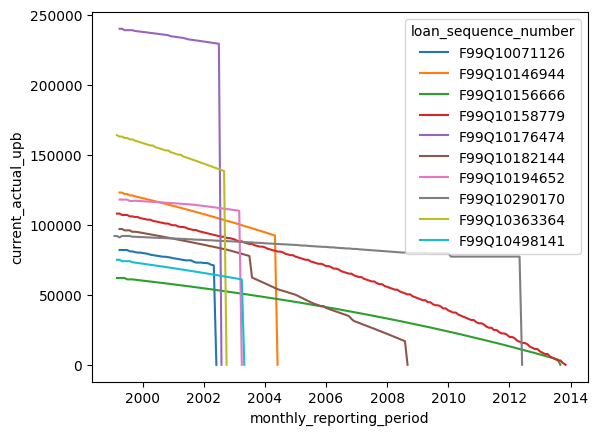

In [75]:
loan_seq_nums = loan_performance_df["loan_sequence_number"].unique()
np.random.seed(42)
loan_seq_sample = np.random.choice(loan_seq_nums, size=10)
loan_perf_sample = loan_performance_df[loan_performance_df["loan_sequence_number"].isin(loan_seq_sample)]

ax = sns.lineplot(x="monthly_reporting_period", 
                  y="current_actual_upb", 
                  hue="loan_sequence_number", 
                  data=loan_perf_sample)

In [76]:
md(f"### {loan_perf_columns_original_format[2]}")

### Current Actual UPB

- The Current Actual UPB reflects the mortgage ending balance as reported by the servicer for the corresponding monthly reporting period. 
- For fixed rate mortgages, this UPB is derived from the mortgage balance as reported by the servicer and includes any scheduled and unscheduled principal reductions applied to the mortgage.
- For mortgages with loan modifications, as indicated by “Y” in the Modification Flag field, the current actual unpaid principal balance may or may not include partial principal forbearance. 
- If applicable, for loans with partial principal forbearance, the current actual unpaid principal balance equals the sum of interest bearing UPB (the amortizing principal balance of the mortgage) and the deferred UPB (the principal forbearance balance).
- Current UPB will be rounded to the nearest $1,000 for the first 6 months after origination date. This was previously reported as zero for the first 6 months after the origination date.


In [77]:
md(f"### {loan_perf_columns_original_format[3]}")

### Current Loan Delinquency Status

- A value corresponding to the number of days the borrower is delinquent, based on the due date of last paid installment (“DDLPI”) reported by servicers to Freddie Mac, and is calculated under the Mortgage Bankers Association (MBA) method.
- If a loan has been acquired by REO, then the Current Loan Delinquency Status will reflect the value corresponding to that status (instead of the value corresponding to the number of days the borrower is delinquent).
- Value meaning
    - XX = Unknown
    - 0 = Current, or less than 30 days past due
    - 1 = 30-59 days delinquent
    - 2 = 60 – 89 days delinquent
    - 3 = 90 – 119 days delinquent
    - And so on…
    - RA = REO Acquisition 
    - Space (3) = Unavailable

In [79]:
delinquency_values = list(loan_performance_df["current_loan_delinquency_status"].unique())

In [80]:
delinquency_values.remove('RA')

In [81]:
delinquency_map = {val: int(val) for val in delinquency_values if isinstance(val, str)}
delinquency_map['RA'] = -1
delinquency_map['XX'] = None
delinquency_map['   '] = None

In [82]:
loan_performance_df.replace({"current_loan_delinquency_status": delinquency_map}, inplace=True)

In [84]:
loan_performance_df["current_loan_delinquency_status"] = loan_performance_df["current_loan_delinquency_status"].astype(int)

In [85]:
md(f"### {loan_perf_columns_original_format[4]}")

### Loan Age

The number of scheduled payments from the time the loan was originated or modified up to and including the performance cutoff date.


In [86]:
md(f"### {loan_perf_columns_original_format[5]}")

### Remaining Months to Legal Maturity

- The remaining number of months to the mortgage maturity date. 
- For mortgages with loan modifications, as indicated by “Y” in the Modification Flag field, the calculation uses the modified maturity date.


In [87]:
md(f"### {loan_perf_columns_original_format[6]}")

### Defect Settlement Date

In [ ]:
# ax = sns.histplot(x="current_loan_delinquency_status", data=loan_performance_df, kde=True)
# # loan_performance_df["current_loan_delinquency_status"].value_counts()

# Looking at one of loans

In [ ]:
loan_performance_F99Q10311153_df = loan_performance_df[loan_performance_df["loan_sequence_number"] == "F99Q10311153"]

In [ ]:
loan_performance_F99Q10311153_df = pd.merge(loan_origination_df, 
                                            loan_performance_F99Q10311153_df, 
                                            on="loan_sequence_number", 
                                            how="inner")

In [ ]:
# loan_seq_nums = loan_performance_df["loan_sequence_number"].unique()
# np.random.seed(42)
# loan_seq_sample = np.random.choice(loan_seq_nums, size=10)
# loan_perf_sample = loan_performance_df[loan_performance_df["loan_sequence_number"].isin(loan_seq_sample)]

# ax = sns.lineplot(x="monthly_reporting_period", 
#                   y="current_actual_upb", 
#                   hue="loan_sequence_number", 
#                   data=loan_perf_sample)

In [ ]:
loan_performance_F99Q10311153_df.head()

In [ ]:
loan_performance_F99Q10311153_df["current_actual_upb"].describe()

In [ ]:
ax = sns.lineplot(x="monthly_reporting_period", 
                  y="current_actual_upb", 
                  data=loan_performance_F99Q10311153_df)

## Sanity Checks

### Monthly Reporting Number